In [3]:
"Przewidywanie ataków serca"

'Przewidywanie ataków serca'

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split

# Wczytaj dane z pliku CSV
df = pd.read_csv('C:/Users/goszc/Desktop/heart.csv')

df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


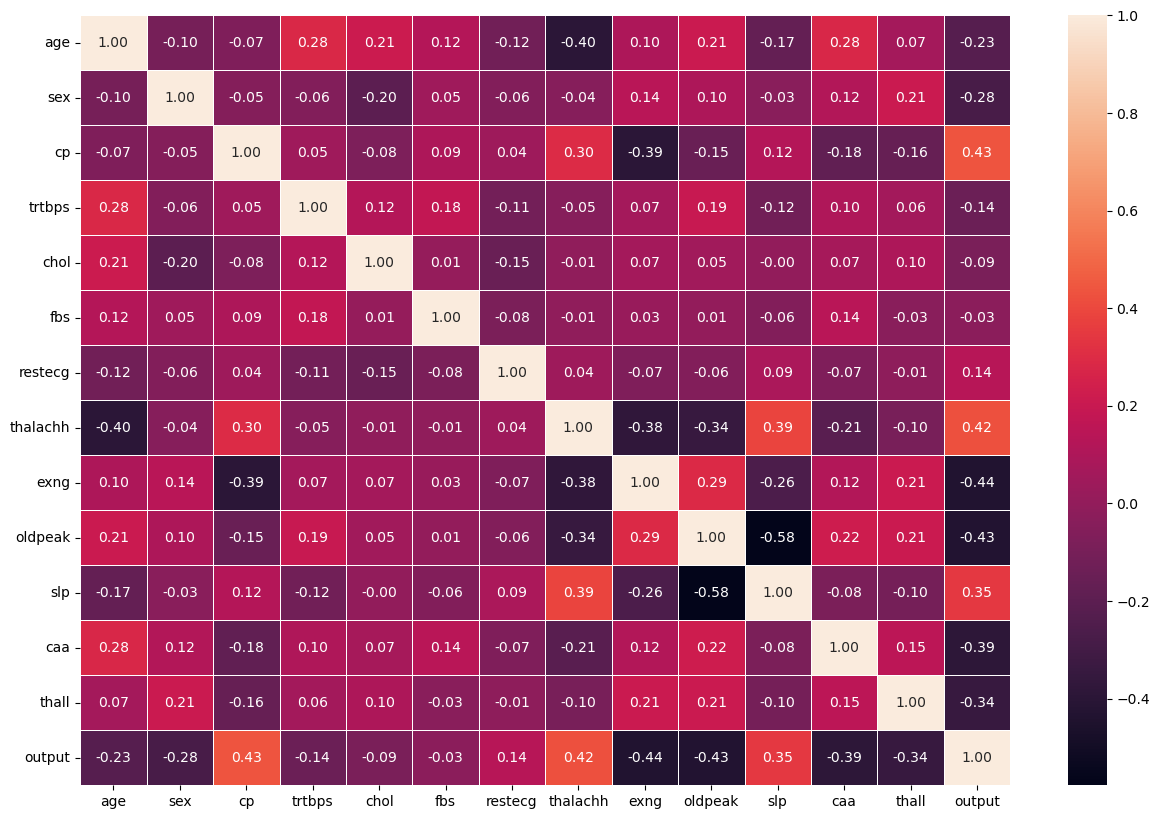

In [11]:
corr_mat = df.corr()
fig , ax = plt.subplots(figsize = (15 , 10))
ax = sns.heatmap(corr_mat , annot=True , linewidths=0.5 , fmt="0.2f" )

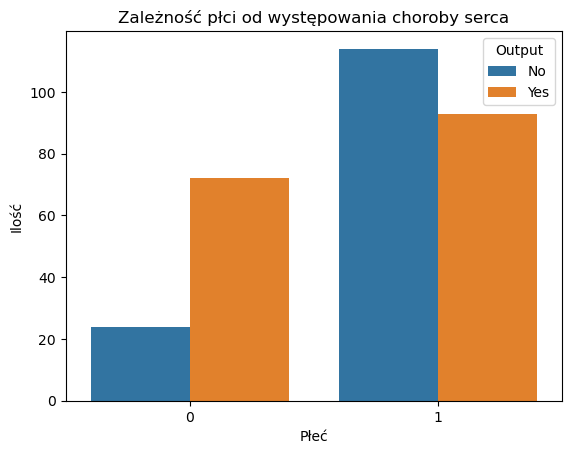

In [23]:
sns.countplot(x='sex', hue='output', data=df)

plt.xlabel('Płeć')
plt.ylabel('Ilość')
plt.title('Zależność płci od występowania choroby serca')
plt.legend(title='Output', loc='upper right', labels=['Nie', 'Tal']) 

plt.show()

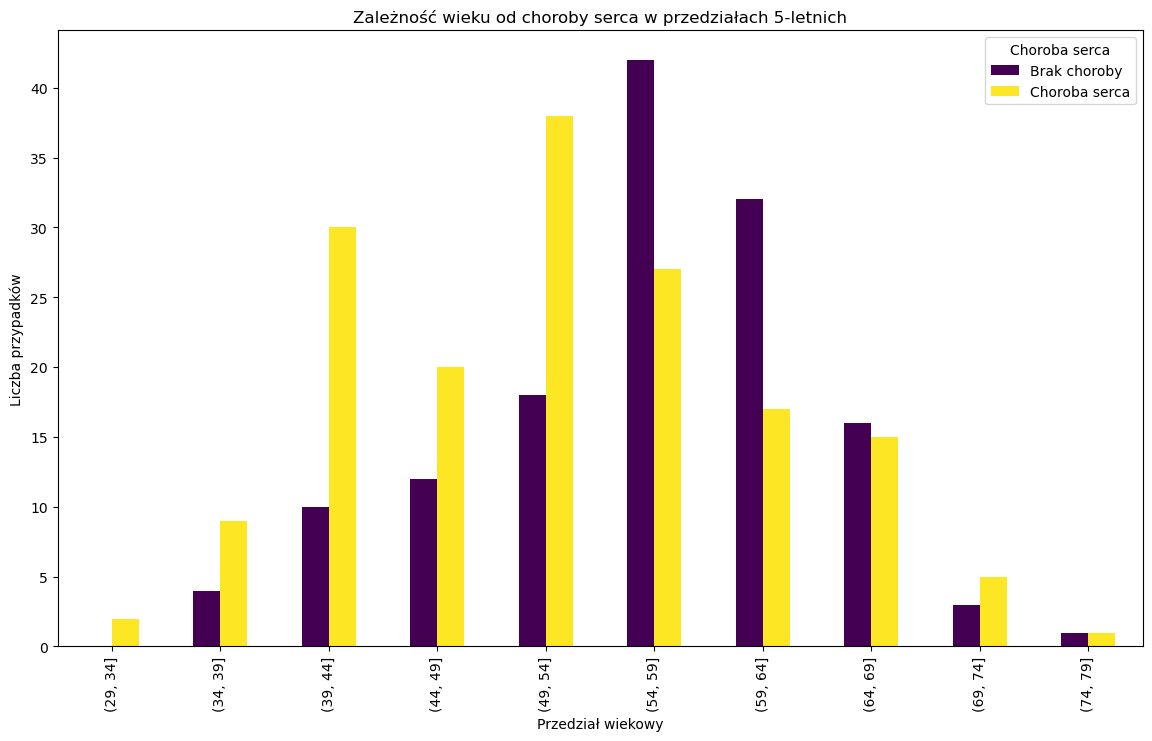

In [27]:
bins = list(range(29, 80, 5))

df['age_group'] = pd.cut(df['age'], bins)

age_counts = df.groupby(['age_group', 'output']).size().unstack()

ax = age_counts.plot(kind='bar', figsize=(14, 8), colormap='viridis')

plt.title('Zależność wieku od choroby serca w przedziałach 5-letnich')
plt.xlabel('Przedział wiekowy')
plt.ylabel('Liczba przypadków')
plt.legend(title='Choroba serca', labels=['Brak choroby', 'Choroba serca'])

plt.show()

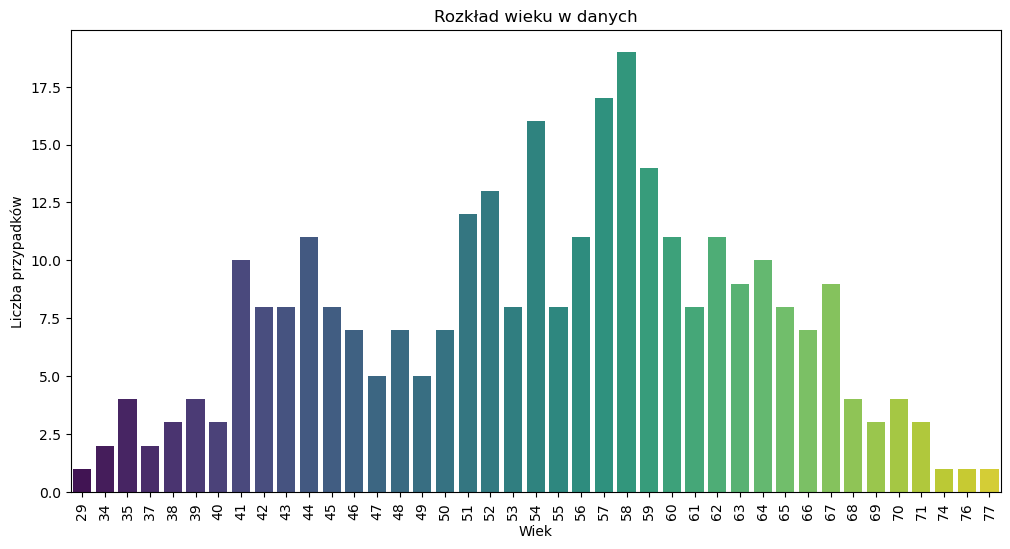

In [29]:
plt.figure(figsize=(12, 6))
sns.countplot(x='age', data=df, palette='viridis')


plt.title('Rozkład wieku w danych')
plt.xlabel('Wiek')
plt.ylabel('Liczba przypadków')


plt.xticks(rotation=90)


plt.show()

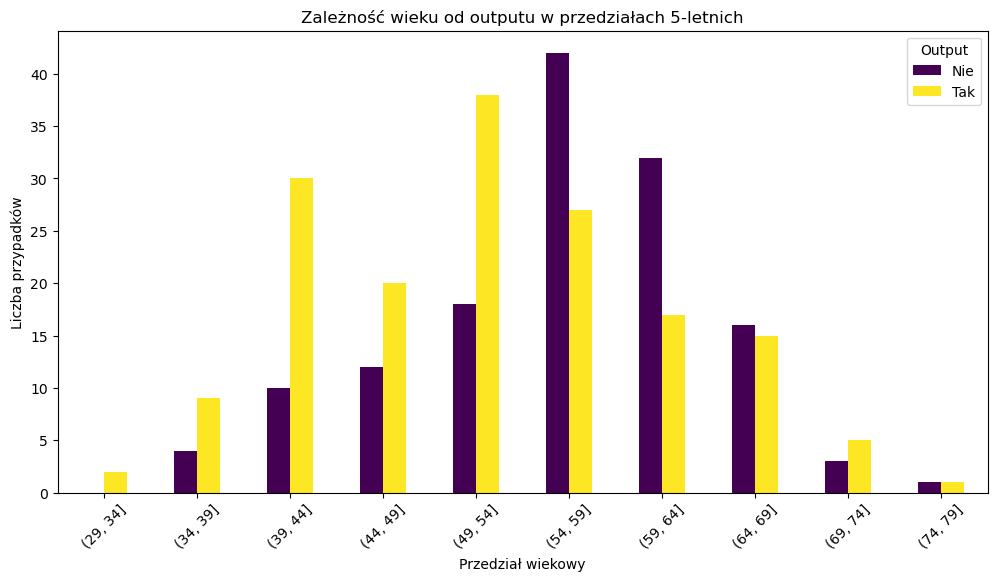

In [47]:
bins = list(range(29, 80, 5))

df['age_group'] = pd.cut(df['age'], bins)

pivot_table = pd.pivot_table(df, values='age', index='age_group', columns='output', aggfunc='count', fill_value=0)

ax = pivot_table.plot(kind='bar', figsize=(12, 6), colormap='viridis')

plt.title('Zależność wieku od outputu w przedziałach 5-letnich')
plt.xlabel('Przedział wiekowy')
plt.ylabel('Liczba przypadków')
plt.xticks(rotation=45)

plt.legend(title='Output', loc='upper right', labels=['Nie', 'Tak'])

plt.show()

In [15]:


# Wybieramy dane, które mają największy wpływ na wynik
features = df[['age', 'sex', 'cp', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']]


labels = df['output']

# Podział danych na zbiór treningowy (70%) i zbiór testowy (30%)
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

print("Rozmiar zbioru treningowego:", len(X_train))
print("Rozmiar zbioru testowego:", len(X_test))

Rozmiar zbioru treningowego: 212
Rozmiar zbioru testowego: 91


In [60]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Standaryzacja danych
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model sieci neuronowej
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Kompilacja modelu
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Nauka modelu
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Oceniaj model na danych testowych
loss, accuracy = model.evaluate(X_test, y_test)
print(f'\nTest Accuracy: {accuracy:.4f}')

Epoch 1/10
7/7 [==============================] - 1s 40ms/step - loss: 0.6456 - accuracy: 0.6415 - val_loss: 0.5962 - val_accuracy: 0.7143
Epoch 2/10
7/7 [==============================] - 0s 10ms/step - loss: 0.5679 - accuracy: 0.7547 - val_loss: 0.5413 - val_accuracy: 0.7802
Epoch 3/10
7/7 [==============================] - 0s 11ms/step - loss: 0.5093 - accuracy: 0.7783 - val_loss: 0.4994 - val_accuracy: 0.8132
Epoch 4/10
7/7 [==============================] - 0s 11ms/step - loss: 0.4626 - accuracy: 0.7925 - val_loss: 0.4692 - val_accuracy: 0.8242
Epoch 5/10
7/7 [==============================] - 0s 13ms/step - loss: 0.4245 - accuracy: 0.8160 - val_loss: 0.4499 - val_accuracy: 0.8352
Epoch 6/10
7/7 [==============================] - 0s 10ms/step - loss: 0.3964 - accuracy: 0.8349 - val_loss: 0.4379 - val_accuracy: 0.8352
Epoch 7/10
7/7 [==============================] - 0s 9ms/step - loss: 0.3739 - accuracy: 0.8443 - val_loss: 0.4302 - val_accuracy: 0.8352
Epoch 8/10
7/7 [============

In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Model random forest
random_forest_model = RandomForestClassifier(n_estimators=10, random_state=42)

# Nauka modelu
random_forest_model.fit(X_train, y_train)

# Przewidywanie na zbiorze testowym
y_pred = random_forest_model.predict(X_test)

# Ocena modelu
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy:.4f}\n')

Test Accuracy: 0.8242

